# Setting up the data frame

In [99]:
import pandas as pd
import numpy as np

# Path of the file to read
train_path = 'train.csv'
test_path = 'test.csv'

# Read csv data
train_df = pd.read_csv(train_path, index_col='PassengerId')
test_df = pd.read_csv(test_path, index_col='PassengerId')

# NOTE: Training data contains 891 samples (40%) compared to 2205 total passengers on board
# NOTE: Test data cointans 418 samples (19%)

In [100]:
# For reference: Changing display of data frame
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

In [102]:
train_df.info()
# test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [104]:
train_df.isnull().sum().sort_values(ascending=False)
# train_df: Null in Age (177), Cabin (687) and Embarked (2)

Cabin       687
Age         177
Embarked      2
Fare          0
Ticket        0
Parch         0
SibSp         0
Sex           0
Name          0
Pclass        0
Survived      0
dtype: int64

In [105]:
test_df.isnull().sum().sort_values(ascending=False)
# test_df: Null in Age (86), Cabin (327) and Fare (1)

Cabin       327
Age          86
Fare          1
Embarked      0
Ticket        0
Parch         0
SibSp         0
Sex           0
Name          0
Pclass        0
dtype: int64

In [5]:
train_df.describe()  # For reference. Describes only numerical columns

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_df.describe(include=['O'])  # For reference

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Carter, Miss. Lucile Polk",male,1601,B96 B98,S
freq,1,577,7,4,644


In [7]:
# For reference
# Same ways to access the same data
train_df.iloc[[2,3,4,5,6], [2,4,8]]  # Integer location, exclusive: [:3] returns 0, 1 and 2; same with columns
train_df.loc[3:7, ['Name', 'Age', 'Fare']]  # Inclusive: [:3] return 0, 1, 2 and 3; same with columns
# To see columns data types:
# df.dtypes

,Name,Age,Fare
PassengerId,,,
3,"Heikkinen, Miss. Laina",26.0,7.9250
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,53.1000
5,"Allen, Mr. William Henry",35.0,8.0500
6,"Moran, Mr. James",NaN,8.4583
7,"McCarthy, Mr. Timothy J",54.0,51.8625


# Preparing data for analysis

In [8]:
train_df['Survived'].value_counts()  # Ammount of passengers that survived (only in train_df)

0    549
1    342
Name: Survived, dtype: int64

In [9]:
# Changing numeric values of 'Survived' columns for boolean ones (only in train_df)
train_df['Survived'] = df['Survived'].map({1: True, 0: False})

In [107]:
train_df['Age'].sort_values().unique()  # To know how many different age are and the range. You could check in test_df too.

array([ 0.17,  0.33,  0.75,  0.83,  0.92,  1.  ,  2.  ,  3.  ,  5.  ,
        6.  ,  7.  ,  8.  ,  9.  , 10.  , 11.5 , 12.  , 13.  , 14.  ,
       14.5 , 15.  , 16.  , 17.  , 18.  , 18.5 , 19.  , 20.  , 21.  ,
       22.  , 22.5 , 23.  , 24.  , 25.  , 26.  , 26.5 , 27.  , 28.  ,
       28.5 , 29.  , 30.  , 31.  , 32.  , 32.5 , 33.  , 34.  , 34.5 ,
       35.  , 36.  , 36.5 , 37.  , 38.  , 38.5 , 39.  , 40.  , 40.5 ,
       41.  , 42.  , 43.  , 44.  , 45.  , 46.  , 47.  , 48.  , 49.  ,
       50.  , 51.  , 53.  , 54.  , 55.  , 57.  , 58.  , 59.  , 60.  ,
       60.5 , 61.  , 62.  , 63.  , 64.  , 67.  , 76.  ,   nan])

In [108]:
# Adding new column with passengers grouped by age
# Range goes from 0 (inclusive) to 80, by 10.

for df in [train_df, test_df]:
    df['Age_group'] = pd.cut(df['Age'], bins=[g for g in range(0, 81, 10)], include_lowest=True)

In [110]:
train_df['Fare'].sort_values().unique()  # To know how many different fares are and the range. You could check in test_df too.
# df['Fare'].sort_values().unique().size --> 248 different fares

array([  0.    ,   3.1708,   6.4375,   6.4958,   6.95  ,   7.    ,
         7.05  ,   7.225 ,   7.2292,   7.25  ,   7.2833,   7.55  ,
         7.575 ,   7.5792,   7.6292,   7.65  ,   7.7208,   7.725 ,
         7.7333,   7.75  ,   7.775 ,   7.7792,   7.7958,   7.8208,
         7.8292,   7.85  ,   7.8542,   7.8792,   7.8875,   7.8958,
         7.925 ,   8.05  ,   8.1125,   8.5167,   8.6625,   8.7125,
         8.9625,   9.225 ,   9.325 ,   9.35  ,   9.5   ,   9.6875,
        10.5   ,  10.7083,  11.5   ,  12.1833,  12.2875,  12.35  ,
        12.7375,  12.875 ,  13.    ,  13.4167,  13.5   ,  13.775 ,
        13.8583,  13.8625,  13.9   ,  14.1083,  14.4   ,  14.4542,
        14.4583,  14.5   ,  15.0333,  15.0458,  15.1   ,  15.2458,
        15.5   ,  15.55  ,  15.5792,  15.7417,  15.75  ,  15.9   ,
        16.    ,  16.1   ,  16.7   ,  17.4   ,  18.    ,  20.2125,
        20.25  ,  20.575 ,  21.    ,  21.075 ,  21.6792,  22.025 ,
        22.3583,  22.525 ,  23.    ,  23.25  ,  23.45  ,  24.1

In [111]:
# Changing char values of 'Embarked' column for string ones

for df in [train_df, test_df]:
    df['Embarked'].replace({'C': 'Cherbourg', 'Q': 'Queenstown', 'S':'Southampton'}, inplace=True)

In [14]:
# Adding new columns to data frame relative to fare groups
# Lower fare: between 0 and 30 (0 inclusive) [groups going up by 2]
# Middle fare: between 30 and 150 (30 inclusive) [groups going up by 15]
# Higher fare: between 150 and 551 (150 inclusive) [groups going up by 50]

for df in [train_df, test_df]:
    df['Fare_group_lower'] = pd.cut(df['Fare'], bins=[g for g in range(0, 31, 2)], include_lowest=True)
    df['Fare_group_middle'] = pd.cut(df['Fare'], bins=[g for g in range(30, 151, 15)], include_lowest=True)
    df['Fare_group_higher'] = pd.cut(df['Fare'], bins=[g for g in range(150, 551, 50)], include_lowest=True)

In [15]:
# Put all Fare groups in a single column 
for df in [train_df, test_df]:
    # Idea from: https://stackoverflow.com/questions/39291499/how-to-concatenate-multiple-column-values-into-a-single-column-in-panda-datafram/39291596
    cols = ['Fare_group_lower', 'Fare_group_middle', 'Fare_group_higher']
    df['Fare_group'] = df[cols].apply(lambda row: ''.join(row.values.astype(str)), axis=1)
    # Idea from https://stackoverflow.com/questions/38565849/pandas-replace-substring-in-string
    df['Fare_group'].replace({'nan': ''}, inplace=True, regex=True)
    df['Fare_group'].replace({'': np.nan}, inplace=True)
    df['Fare_group'] = df['Fare_group'].astype('category')

In [16]:
# Extracting Title from the Name column
for df in [train_df, test_df]:
    df['Title'] = df.Name.str.extract('([A-Za-z]+)\.')
    
train_df['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Don           1
Jonkheer      1
Lady          1
Sir           1
Countess      1
Capt          1
Mme           1
Ms            1
Name: Title, dtype: int64

In [17]:
# Merging Titles
# Comparing Titles with the Sex feature to figure out how rarely used titles can be merged with other titles
pd.crosstab(train_df['Title'], df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [18]:
replace_titles = ['Capt','Col','Countess','Don','Jonkheer','Lady','Major','Dr','Rev','Sir', 'Dona']
for df in [train_df, test_df]:
    df['Title'] = df['Title'].replace(replace_titles, 'other')
    df['Title'] = df['Title'].replace('Mlle', 'Miss')
    df['Title'] = df['Title'].replace('Ms', 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')

In [19]:
# For reference. Checking the passengers that have the highest fare
train_df[train_df['Fare_group_higher'].notnull()]['Fare'].sort_values(ascending=False)
# df.loc[680]
# df.loc[738]
train_df.loc[488]

# Nota de color: £1 de 1912 puede llegar a ser equivalente a £21.2 hoy en día. 
# Eso significa que la tarifa más alta (£512) equivale a £10,854, o sea, cerca de un millón de pesos argentinos.

Survived                               False
Pclass                                     1
Name                 Kent, Mr. Edward Austin
Sex                                     male
Age                                       58
SibSp                                      0
Parch                                      0
Ticket                                 11771
Fare                                    29.7
Cabin                                    B37
Embarked                           Cherbourg
Age_group                       (50.0, 60.0]
Fare_group_lower                (28.0, 30.0]
Fare_group_middle                        NaN
Fare_group_higher                        NaN
Fare_group                      (28.0, 30.0]
Title                                     Mr
Name: 488, dtype: object

# Visualizing data from train_df

In [20]:
import seaborn as sns
sns.set(style="darkgrid", rc={'figure.figsize':(10,6)})

import matplotlib.pyplot as plt

#### Survivors
549 Died
342 Survived

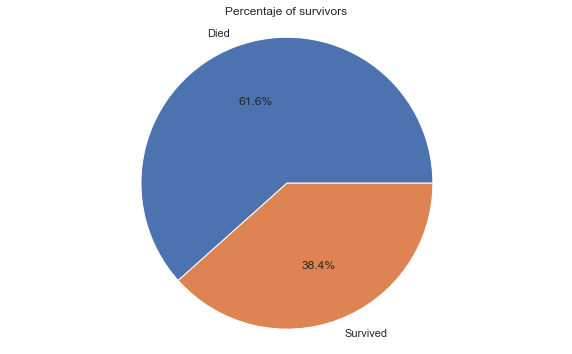

In [21]:
# Idea from https://datatofish.com/pie-chart-matplotlib/

my_data = 100.0*train_df['Survived'].value_counts() / len(df)
my_labels = ['Died', 'Survived']
plt.pie(my_data,labels=my_labels,autopct='%1.1f%%')
plt.title('Percentaje of survivors')
plt.axis('equal')
plt.show()

#### Survivors by sex

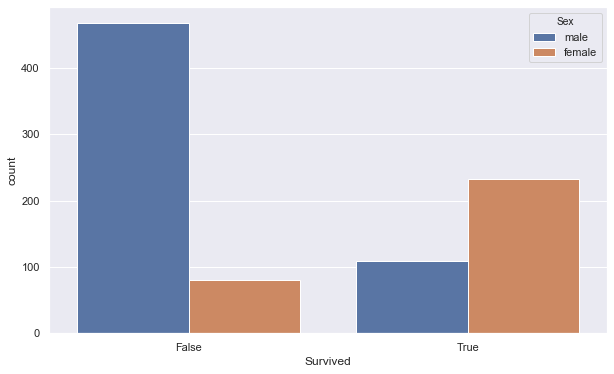

In [22]:
# sns.countplot(y='Survived', hue='Sex', data=df, palette="Greens_d")  # Previous plot
sns.countplot(x='Survived', hue='Sex', data=train_df)

#### Age distribution

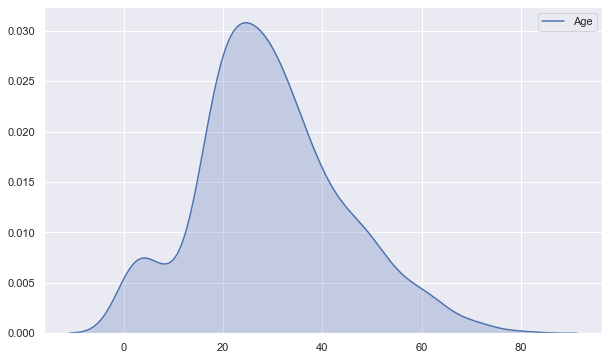

In [23]:
sns.kdeplot(data=train_df['Age'], label="Age", shade=True)  # Density plot
# Its important to know that there are 177 rows in which Age data is missing
# Check: df.loc[df["Age"].isna()]

#### Survivors by age

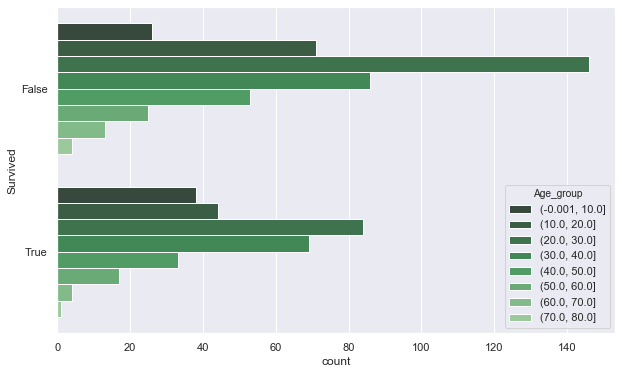

In [24]:
# Idea sacada de: https://stackoverflow.com/questions/34251641/how-to-make-a-bar-plot-of-non-numerical-data-in-pandas
sns.countplot(y='Survived', hue='Age_group', data=train_df, palette="Greens_d")

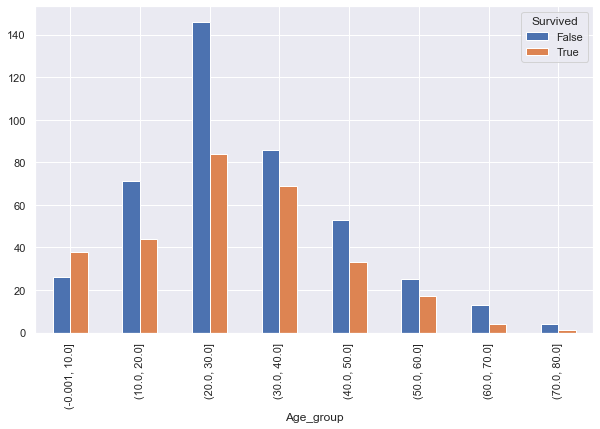

In [25]:
# Idea sacada de: https://stackoverflow.com/questions/34251641/how-to-make-a-bar-plot-of-non-numerical-data-in-pandas
graph=train_df.groupby(['Age_group','Survived']).size().unstack()
graph.plot(kind='bar')

#### Survivors by sex and age

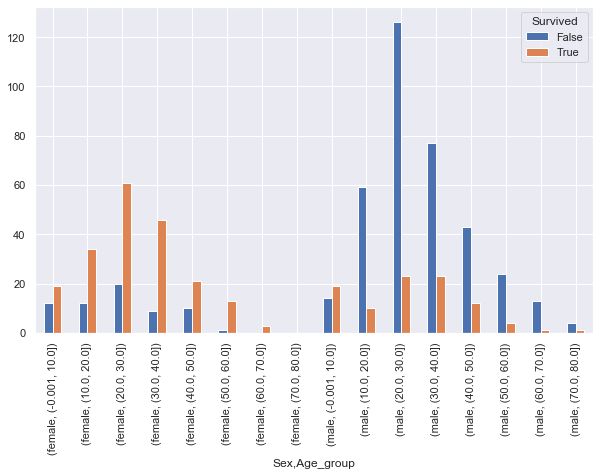

In [26]:
graph = train_df.groupby(['Sex','Age_group','Survived']).size().unstack()
graph.plot(kind='bar')

#### Survivors by passenger class

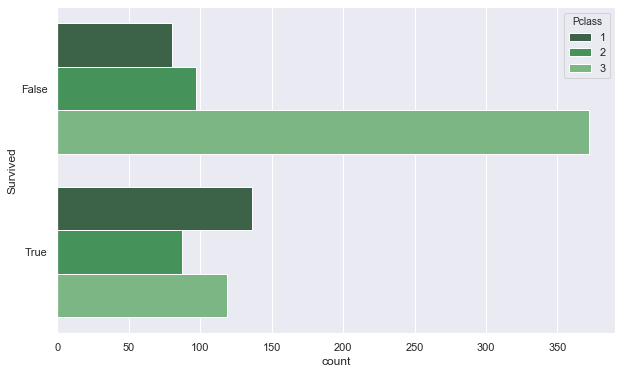

In [27]:
sns.countplot(y='Survived', hue='Pclass', data=train_df, palette="Greens_d")

#### Survivors by sex and passenger class

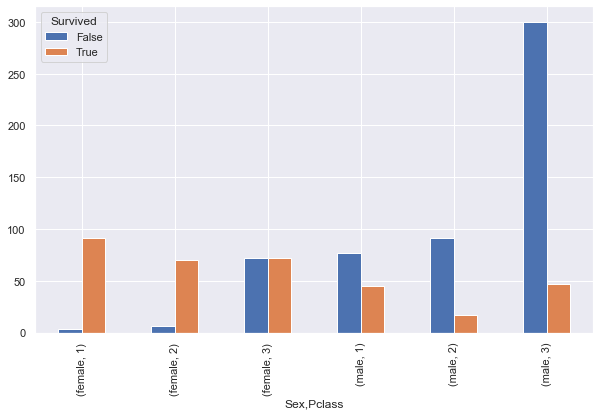

In [28]:
graph = train_df.groupby(['Sex','Pclass','Survived']).size().unstack()
graph.plot(kind='bar')

#### Fare distribution

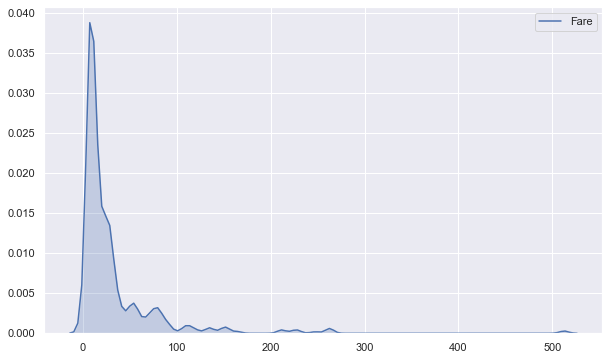

In [29]:
sns.kdeplot(data=train_df['Fare'], label="Fare" ,shade=True)  # Density plot

#### Survivors by fare groups
This is done in groups due the large quantity of different fares (248).

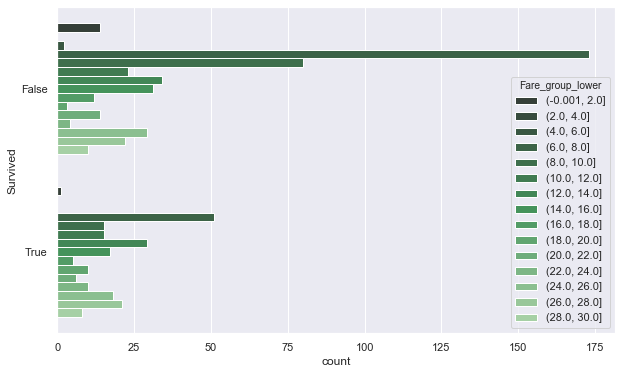

In [30]:
sns.countplot(y='Survived', hue='Fare_group_lower', data=train_df, palette="Greens_d")

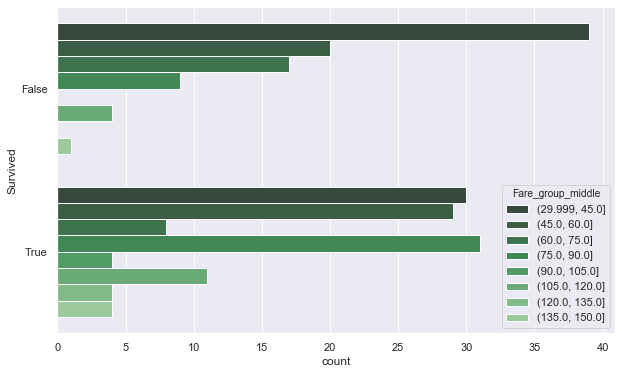

In [31]:
sns.countplot(y='Survived', hue='Fare_group_middle', data=train_df, palette="Greens_d")

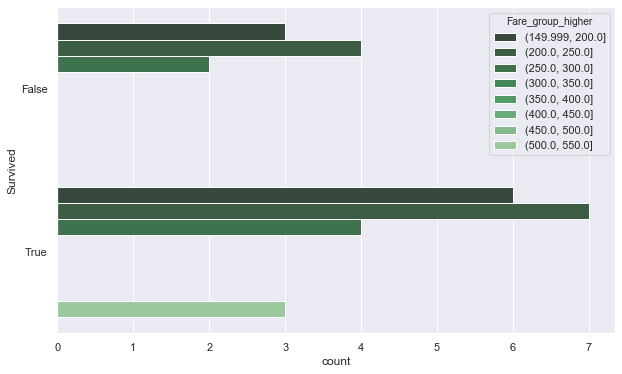

In [32]:
sns.countplot(y='Survived', hue='Fare_group_higher', data=train_df, palette="Greens_d")

#### Survivors by sex and fare groups 

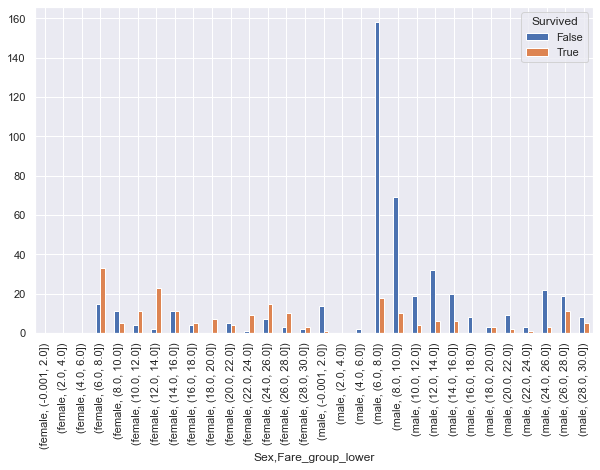

In [33]:
graph=train_df.groupby(['Sex','Fare_group_lower','Survived']).size().unstack()
graph.plot(kind='bar')

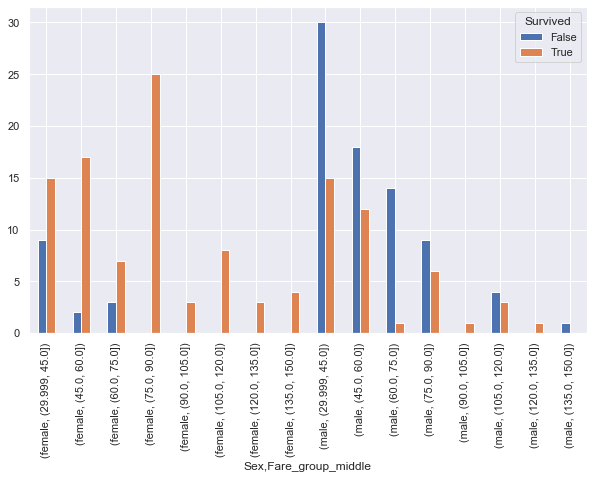

In [34]:
graph=train_df.groupby(['Sex','Fare_group_middle','Survived']).size().unstack()
graph.plot(kind='bar')

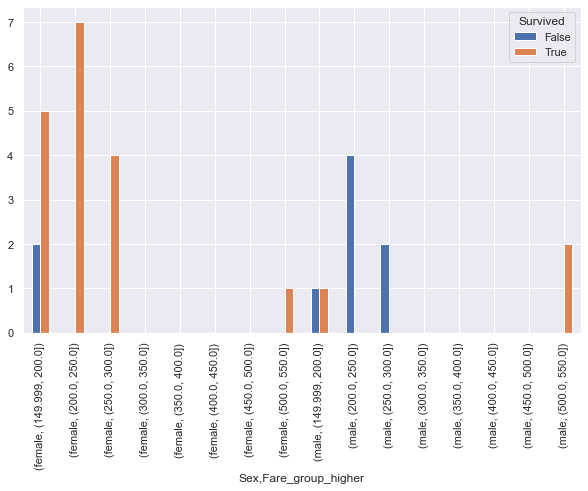

In [35]:
graph=train_df.groupby(['Sex','Fare_group_higher','Survived']).size().unstack()
graph.plot(kind='bar')

#### Survivors by Embarkment

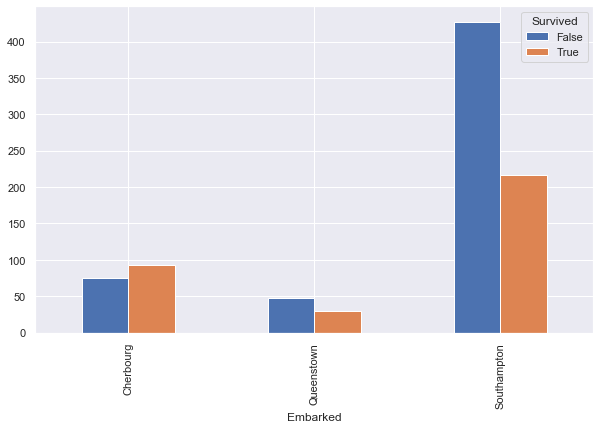

In [36]:
graph=train_df.groupby(['Embarked','Survived']).size().unstack()
graph.plot(kind='bar')

# Conclusions on data visualization

In [38]:
train_df.corr()['Survived']
# For technical reference only; it doesn´t have much to offer in this context

Survived    1.000000
Pclass     -0.338481
Age        -0.077221
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Name: Survived, dtype: float64

In [39]:
# Ratios

# Sex survival ratio  --> Could use too:  df[['Sex', 'Survived']].groupby('Sex', as_index=False).mean()
sex_ratio = train_df.groupby("Sex")['Survived'].mean()
# female    0.742038 --> 74% of females survived
# male      0.188908 --> 19% of males survived

# Title survival ratio
title_ratio = train_df[['Title','Survived']].groupby('Title').mean().sort_values('Survived', ascending=False)
# Mrs      0.788991 --> 79%
# Miss     0.724832 --> 72%
# Master   0.583333 --> 58%
# other    0.363636 --> 36%
# Mr       0.168342 --> 17%

# Class survival ratio  --> Could use too: df[['Pclass','Survived']].groupby('Pclass', as_index=False).mean()
class_ratio = train_df.groupby("Pclass")['Survived'].mean()
# 1    0.629630 --> 63% of first class survived
# 2    0.472826 --> 47% of second class survived
# 3    0.242363 --> 24% of third class survived

# Number of Sibling/Spouse survival ratio
sibsp_ratio = train_df[['SibSp', 'Survived']].groupby('SibSp', as_index=False).mean().sort_values('Survived', ascending=False)
# 1    0.535885  --> 53%
# 2    0.464286  --> 46%
# 0    0.345395  --> 34%
# 3    0.250000  --> 25%
# 4    0.166667  --> 16%
# 5    0.000000  --> 0%
# 6    0.000000  --> 0%

# Number of Parents/Children survival ratio
parch_ratio = train_df[['Parch','Survived']].groupby('Parch', as_index=False).mean().sort_values('Survived', ascending=False)
# 3    0.600000  --> 60%
# 1    0.550847  --> 55%
# 2    0.500000  --> 50%
# 5    0.343658  --> 34%
# 0    0.200000  --> 20%
# 4    0.000000  --> 0%
# 6    0.000000  --> 0%

# Lower fare survival ratio
total_lower = train_df[train_df['Fare_group_lower'].notnull()].size
surv_lower = train_df[(train_df['Fare_group_lower'].notnull()) & (df['Survived'] == 1)].size
ratio_lower_surv = surv_lower/total_lower  # 31% of lower fare survived
# Middle fare survival ratio
total_middle = train_df[train_df['Fare_group_middle'].notnull()].size
surv_middle = train_df[(train_df['Fare_group_middle'].notnull()) & (df['Survived'] == 1)].size
ratio_middle_surv = surv_middle/total_middle  # 56% of middle fare survived
# Higher fare survival ratio
total_higher = train_df[train_df['Fare_group_higher'].notnull()].size
surv_higher = train_df[(train_df['Fare_group_higher'].notnull()) & (df['Survived'] == 1)].size
ratio_higher_surv = surv_higher/total_higher  # 65% of higher fare survived

# Age survival ratio
total = train_df.groupby("Age_group")['Survived'].mean()
# (-0.001, 10.0]    0.593750 --> 59%
# (30.0, 40.0]      0.445161 --> 44%
# (50.0, 60.0]      0.404762 --> 40%
# (40.0, 50.0]      0.383721 --> 38%
# (10.0, 20.0]      0.382609 --> 38%
# (20.0, 30.0]      0.365217 --> 36%
# (60.0, 70.0]      0.235294 --> 23%
# (70.0, 80.0]      0.200000 --> 20%

# Embarkment survival ratio  --> Could use too: 
# df[['Embarked','Survived']].groupby('Embarked', as_index=False).mean().sort_values('Survived', ascending=False)
total = train_df.groupby("Embarked")['Survived'].mean()
# Cherbourg        0.607692 --> 60%
# Southampton      0.362816 --> 36%
# Queenstown       0.285714 --> 28%

#### Conclusions:

- A male that payed a lower fare for a class 3 has very low probabilities to survive.
- A female that payed a higher fare for a class 1 has very high probabilities to survive.
- Its more probable for a female to survive; the contrary is for a male.
- Its more probable for a class 1 passeger to survive than a class 2, and even more than a class 3.
- Its more probable for someone that payed a higher fare survives than some that payed a middle or, even more, a lower fare.
- Children have high probabilities to survive; the elder people have very low chances to survive.
- Middle aged men have very low probabilities to survive. Middle aged women have very high probabilities to survive.
- People that embarked in Southampton and Queenstown has low probabilities to survive.
- Passangers with lesser SibSp have a higher survival rate
- SibSp and Parch have zero correlation for certain values


# Feature Engineering
#### Preparing data for machine learning

In [ ]:
# Changing boolean to int of 'Survived'
for df in [train_df, test_df]:
    df['Survived'] = df['Survived'].map({True: 1, False: 0})

In [40]:
# Changing string to int of 'Sex'
for df in [train_df, test_df]:
    df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})

In [41]:
print('Number of age entries missing for title Miss:', train_df[train_df['Title'] == 'Miss']['Age'].isnull().sum())
print('Number of age entries missing for title Mr:', train_df[train_df['Title'] == 'Mr']['Age'].isnull().sum())
print('Number of age entries missing for title Mrs:', train_df[train_df['Title'] == 'Mrs']['Age'].isnull().sum())
print('Number of age entries missing for title other:', train_df[train_df['Title'] == 'other']['Age'].isnull().sum())
print('Number of age entries missing for title Master:', train_df[train_df['Title'] == 'Master']['Age'].isnull().sum())

Number of age entries missing for title Miss: 36
Number of age entries missing for title Mr: 119
Number of age entries missing for title Mrs: 17
Number of age entries missing for title other: 1
Number of age entries missing for title Master: 4


In [42]:
print('Mean age for title Miss:', train_df[train_df['Title'] == 'Miss']['Age'].mean())
print('Mean age for title Mr:', train_df[train_df['Title'] == 'Mr']['Age'].mean())
print('Mean age for title Mrs:', train_df[train_df['Title'] == 'Mrs']['Age'].mean())
print('Mean age for title other:', train_df[train_df['Title'] == 'other']['Age'].mean())
print('Mean age for title Master:', train_df[train_df['Title'] == 'Master']['Age'].mean())

Mean age for title Miss: 21.845637583892618
Mean age for title Mr: 32.368090452261306
Mean age for title Mrs: 35.788990825688074
Mean age for title other: 45.54545454545455
Mean age for title Master: 4.574166666666667


In [43]:
for df in [train_df, test_df]:
    df.loc[(df['Title']== 'Miss') & (df['Age'].isnull()), 'Age'] = 22
    df.loc[(df['Title']== 'Mr') & (df['Age'].isnull()), 'Age'] = 32
    df.loc[(df['Title']== 'Mrs') & (df['Age'].isnull()), 'Age'] = 36
    df.loc[(df['Title']== 'other') & (df['Age'].isnull()), 'Age'] = 46
    df.loc[(df['Title']== 'Master') & (df['Age'].isnull()), 'Age'] = 5

In [44]:
# Mrs      79% --> 0
# Miss     72% --> 1
# Master   58% --> 2
# other    36% --> 3
# Mr   17% --> 4

for df in [train_df, test_df]:
    df['Title'] = df['Title'].map({'Mrs': 0, 'Miss': 1, 'Master': 2, 'other': 3, 'Mr': 4})

In [45]:
# Changing string values of 'Embarked' column for int ones by survival rate
# Cherbourg        60% --> 0
# Southampton      36% --> 1
# Queenstown       28% --> 2

for df in [train_df, test_df]:
    df['Embarked'] = df['Embarked'].fillna('Southampton')
    df['Embarked'].replace({'Cherbourg': 0, 'Queenstown': 2, 'Southampton': 1}, inplace=True)


In [46]:
# (-0.001, 10.0]    0.593750 --> Asigned: 0
# (30.0, 40.0]      0.445161 --> Asigned: 1
# (50.0, 60.0]      0.404762 --> Asigned: 2
# (40.0, 50.0]      0.383721 --> Asigned: 3
# (10.0, 20.0]      0.382609 --> Asigned: 4
# (20.0, 30.0]      0.365217 --> Asigned: 5
# (60.0, 70.0]      0.235294 --> Asigned: 6
# (70.0, 80.0]      0.200000 --> Asigned: 7

for df in [train_df, test_df]:
    df.loc[df['Age'] > 70, 'Age'] = 7
    df.loc[(df['Age'] > 60) & (df['Age'] <= 70), 'Age'] = 6
    df.loc[(df['Age'] > 50) & (df['Age'] <= 60), 'Age'] = 2
    df.loc[(df['Age'] > 40) & (df['Age'] <= 50), 'Age'] = 3
    df.loc[(df['Age'] > 30) & (df['Age'] <= 40), 'Age'] = 1
    df.loc[(df['Age'] > 20) & (df['Age'] <= 30), 'Age'] = 5
    df.loc[(df['Age'] > 10) & (df['Age'] <= 20), 'Age'] = 4
    df.loc[(df['Age'] >= 0) & (df['Age'] <= 10), 'Age'] = 0

In [47]:
#test_df[test_df['Fare'].isnull()]
# train_df[train_df['Pclass'] == 3]['Fare'].mean() --> 13.675550101832997

# 65% of higher fare (150, 551] survived --> Asigned: 0
# 56% of middle fare (30, 150] survived --> Asigned: 1
# 31% of lower fare (0, 30] survived --> Asigned: 2

for df in [train_df, test_df]:
    df['Fare'] = df['Fare'].fillna(14)
    df.loc[(df['Fare'] > 150), 'Fare'] = 0
    df.loc[(df['Fare'] > 30) & (df['Fare'] <= 150), 'Fare'] = 1
    df.loc[(df['Fare'] >= 0) & (df['Fare'] <= 30), 'Fare'] = 0

In [48]:
for df in [train_df, test_df]:
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
# The logic adding adding 1 is for solo passengers that don't have any siblings/spouses or parents/children. 
# This feature takes care of all the information in the features SibSp and Parch

#### Getting features, target, and dummies

In [49]:
features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Title', 'FamilySize']

# Separating features and target
X = train_df[features]
y = train_df['Survived']

test_df = test_df[features]

In [50]:
# Creating dummies for all features
dummy_cols = ['Pclass','Sex', 'Age',  'Fare', 'Embarked', 'Title', 'FamilySize']
prefix_cats = ['pcl', 'sex', 'age', 'fare', 'emb', 'title', 'fsize']

X = train_pd.get_dummies(X, columns=dummy_cols, prefix=prefix_cats, drop_first=True)
test_df = test_pd.get_dummies(test_df, columns=dummy_cols, prefix=prefix_cats, drop_first=True)

In [51]:
X.head()

,pcl_2,pcl_3,sex_1,emb_1,emb_2,title_1,title_2,title_3,title_4,fsize_2,fsize_3,fsize_4,fsize_5,fsize_6,fsize_7,fsize_8,fsize_11
PassengerId,,,,,,,,,,,,,,,,,
1,0,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
5,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0


In [66]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# sc_X = StandardScaler()
# X_train = sc_X.fit_transform(X_train)
# X_test = sc_X.transform(X_test)

# Machine Learning Models

In [67]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

### Initialize all the predictors and fit the training data

In [69]:
# Logistic Regression
log_clf = LogisticRegression(random_state=42)
log_clf.fit(X, y)

# SGDClassifier: Linear classifiers (SVM, logistic regression, a.o.) with SGD training.
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X, y)

# Support Vector Machine
svc_clf = SVC(random_state=42)
svc_clf.fit(X, y)

# Decision Tree
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X, y)

# Random Forest
forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X, y)

# Extra Trees
extra_clf = ExtraTreesClassifier(random_state=42)
extra_clf.fit(X, y)

# Gradient Booster
gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X, y)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

### Cross_val_predict and generate accuracy scores for all the predictors

In [70]:
# Logistic Regression
log_preds = cross_val_predict(estimator=log_clf, X=X, y=y, cv=10)
log_acc = accuracy_score(y, log_preds)

# SGDClassifier
sgd_preds = cross_val_predict(estimator = sgd_clf, X=X, y=y, cv=10)
sgd_acc = accuracy_score(y, sgd_preds)

# Support Vector Machine
svc_preds = cross_val_predict(estimator = svc_clf, X=X, y=y, cv=10)
svc_acc = accuracy_score(y, svc_preds)

# Decision Tree
tree_preds = cross_val_predict(estimator = tree_clf, X=X, y=y, cv=10)
tree_acc = accuracy_score(y, tree_preds)

# Random Forest
forest_preds = cross_val_predict(estimator = forest_clf, X=X, y=y, cv=10)
forest_acc = accuracy_score(y, forest_preds)

# Extra Trees
extra_preds = cross_val_predict(estimator = extra_clf, X=X, y=y, cv=10)
extra_acc = accuracy_score(y, extra_preds)

# Gradient Booster
gb_preds = cross_val_predict(estimator = gb_clf, X=X, y=y, cv=10)
gb_acc = accuracy_score(y, gb_preds)

print('log_clf', log_acc)
print('sgd_clf', sgd_acc)
print('svc_clf', svc_acc)
print('tree_clf', tree_acc)
print('forest_clf', forest_acc)
print('extra_clf', extra_acc)
print('gb_clf', gb_acc)

### Hyperparameter tuning

#### Generating paramater grids for predictors

In [72]:
# Logistic Regression
log_param = [
    {#'penalty':['l1', 'l2', 'elasticnet'],
    'C':[0.001, 0.01, 0.1, 1.0, 10.0]
    }
]

# SGDClassifier
sgd_param = [
    {'alpha':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
    #'penalty':['l1', 'l2', 'elasticnet']
    }
]

# Support Vector Machine
svc_param = [
    {'C':[0.001, 0.01, 0.1, 1.0, 10.0],
    'gamma':[0.001, 0.01, 0.1, 1.0],
    'kernel':['rbf', 'sigmoid']}
]

# Decision Tree
tree_param = [
    {'max_depth':[2,4,8,12,16,20,30],
    'min_samples_split':[2,4,6,8,10],
    'min_samples_leaf':[2,4,6,8,10]
    }
]

# Random Forest
forest_param = [
    {'max_depth':[2,4,8,12,16,20],
    'min_samples_split':[2,4,6,8,10],
    'min_samples_leaf':[2,4,6,8,10],
    'n_estimators':[100,200,300]}
]

# Extra Trees
extra_param = [
    {'max_depth':[2,4,8,12,16,20,30],
    'min_samples_split':[2,4,6,8,10],
    'min_samples_leaf':[2,4,6,8,10]}
]

# Gradient Booster
gb_param = [
    {'max_depth':[2,8,16,20],
    'min_samples_split':[2,4,6,10],
    'min_samples_leaf':[2,4,6,10],
    'learning_rate':[0.01, 0.05, 0.1],
    'n_estimators':[100,200,300],
    'subsample':[0.5, 0.8, 1.0]}
]

#### Initialize GridSearchCV and store best estimator

In [73]:
# Logistic Regression
log_grid = GridSearchCV(log_clf, log_param, cv=5)
log_grid.fit(X, y)
log_best = log_grid.best_estimator_

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=42, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1.0, 10.0]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [75]:
# SGDClassifier
sgd_grid = GridSearchCV(sgd_clf, sgd_param, cv=5)
sgd_grid.fit(X, y)
sgd_best = sgd_grid.best_estimator_

GridSearchCV(cv=5, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5, random_state=42,
                                     shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0,
                                    100.0]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
         

In [77]:
# Support Vector Machine
svc_grid = GridSearchCV(svc_clf, svc_param, cv=5)
svc_grid.fit(X, y)
svc_best = svc_grid.best_estimator_

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=42, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1.0, 10.0],
                          'gamma': [0.001, 0.01, 0.1, 1.0],
                          'kernel': ['rbf', 'sigmoid']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [79]:
# Decision Tree
tree_grid = GridSearchCV(tree_clf, tree_param, cv=5)
tree_grid.fit(X, y)
tree_best = tree_grid.best_estimator_

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'max_depth': [2, 4, 8, 12, 16, 20, 30],
              

In [81]:
# Random Forest
forest_grid = GridSearchCV(forest_clf, forest_param, cv=5, verbose=1, n_jobs=-1)
forest_grid.fit(X, y)
forest_best = forest_grid.best_estimator_

Fitting 5 folds for each of 450 candidates, totalling 2250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   43.4s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 2250 out of 2250 | elapsed:  9.4min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [83]:
# Extra Trees
extra_grid = GridSearchCV(extra_clf, extra_param, cv=5, verbose=1, n_jobs=-1)
extra_grid.fit(X, y)
extra_best = extra_grid.best_estimator_

Fitting 5 folds for each of 175 candidates, totalling 875 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   22.1s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   45.9s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 875 out of 875 | elapsed:  1.4min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                            class_weight=None, criterion='gini',
                                            max_depth=None, max_features='auto',
                                            max_leaf_nodes=None,
                                            max_samples=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100, n_jobs=None,
                                            oob_score=False, random_state=42,
                                            verbose=0, warm_start=False),
             iid='deprecated'

In [85]:
# Gradient Booster
gb_grid = GridSearchCV(gb_clf, gb_param, cv=5, verbose=1, n_jobs=-1)
gb_grid.fit(X, y)
gb_best = gb_grid.best_estimator_

Fitting 5 folds for each of 1728 candidates, totalling 8640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   18.3s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   44.0s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 15.6min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed: 20.8min
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed: 25.6min
[Parallel(n_jobs=-1)]: Done 7192 tasks      | elapsed: 30.0min
[Parallel(n_jobs=-1)]: Done 8442 tasks      | elapsed: 37.1min
[Parallel(n_jobs=-1)]: Done 8640 out of 8640 | elapsed: 38.0min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_c...
                 

#### Fit the training data in the best predictors

In [87]:
# Logistic Regression
log_best.fit(X, y)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [88]:
#SGDClassifier
sgd_best.fit(X, y)

SGDClassifier(alpha=0.001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [89]:
# Support Vector Machine
svc_best.fit(X, y)

SVC(C=10.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [90]:
# Decision Tree
tree_best.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [91]:
# Random Forest
forest_best.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [92]:
# Extra Trees
extra_best.fit(X, y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=4, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=2, min_samples_split=8,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=42, verbose=0,
                     warm_start=False)

In [93]:
# Gradient Booster
gb_best.fit(X, y)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=8,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=10, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=0.5, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

#### Cross_val_predict and generate accuracy scores for all the best predictors

In [94]:
# Logistic Regression
log_best_preds = cross_val_predict(estimator = log_best, X=X, y=y, cv=10)
log_best_acc = accuracy_score(y, log_best_preds)

#SGDClassifier
sgd_best_preds = cross_val_predict(estimator = sgd_best, X=X, y=y, cv=10)
sgd_best_acc = accuracy_score(y, sgd_best_preds)

# Support Vector Machine
svc_best_preds = cross_val_predict(estimator = svc_best, X=X, y=y, cv=10)
svc_best_acc = accuracy_score(y, svc_best_preds)

# Decision Tree
tree_best_preds = cross_val_predict(estimator = tree_best, X=X, y=y, cv=10)
tree_best_acc = accuracy_score(y, tree_best_preds)

# Random Forest
forest_best_preds = cross_val_predict(estimator = forest_best, X=X, y=y, cv=10)
forest_best_acc = accuracy_score(y, forest_best_preds)

# Extra Trees
extra_best_preds = cross_val_predict(estimator = extra_best, X=X, y=y, cv=10)
extra_best_acc = accuracy_score(y, extra_best_preds)

# Gradient Booster
gb_best_preds = cross_val_predict(estimator = gb_best, X=X, y=y, cv=10)
gb_best_acc = accuracy_score(y, gb_best_preds)

In [95]:
pred_df = pd.DataFrame()
pred_df = pred_df.append({'b.Best Estimtor Accuracy': log_best_acc, 'b.Accuracy': log_acc, 'a.Model':'log_clf'}, ignore_index=True)
pred_df = pred_df.append({'b.Best Estimtor Accuracy': sgd_best_acc, 'b.Accuracy': sgd_acc, 'a.Model':'sgd_clf'}, ignore_index=True)
pred_df = pred_df.append({'b.Best Estimtor Accuracy': svc_best_acc, 'b.Accuracy': svc_acc, 'a.Model':'svc_clf'}, ignore_index=True)
pred_df = pred_df.append({'b.Best Estimtor Accuracy': tree_best_acc, 'b.Accuracy': tree_acc, 'a.Model':'tree_clf'}, ignore_index=True)
pred_df = pred_df.append({'b.Best Estimtor Accuracy': forest_best_acc, 'b.Accuracy': forest_acc, 'a.Model':'forest_clf'}, ignore_index=True)
pred_df = pred_df.append({'b.Best Estimtor Accuracy': extra_best_acc, 'b.Accuracy': extra_acc, 'a.Model':'extra_clf'}, ignore_index=True)
pred_df = pred_df.append({'b.Best Estimtor Accuracy': gb_best_acc, 'b.Accuracy': gb_acc, 'a.Model':'gb_clf'}, ignore_index=True)

In [96]:
pred_df

,a.Model,b.Accuracy,b.Best Estimtor Accuracy
0,log_clf,0.823034,0.827247
1,sgd_clf,0.771067,0.821629
2,svc_clf,0.824438,0.825843
3,tree_clf,0.793539,0.824438
4,forest_clf,0.796348,0.816011
5,extra_clf,0.804775,0.817416
6,gb_clf,0.810393,0.823034


# Outputing predictions to a csv document for submission

In [ ]:
# incognita_preds = incognita.predict(test_df)

# submission = pd.read_csv('gender_submission.csv', index_col='PassengerId')
# submission['Survived'] = incognita_preds
# submission.to_csv('svc_final_submission.csv')